In [1]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

### Import Iris.csv

In [2]:
irdf = pd.read_csv('Iris-2.csv')
irdf.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
# Check dimension of data
irdf.shape

(150, 6)

In [4]:
#Check data Type
irdf.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
# No Null values found
irdf.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [6]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()
Y = irdf['Species']
irdf['Species'] = lencoder.fit_transform(Y)


In [7]:
#X = irdf.drop('Species', axis = 1)
#y = irdf.pop('Species')

X = irdf[['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = irdf[['Species']]

In [8]:
#Check the dataset
print(y)
print(X)

     Species
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
..       ...
120        2
121        2
122        2
123        2
124        2
125        2
126        2
127        2
128        2
129        2
130        2
131        2
132        2
133        2
134        2
135        2
136        2
137        2
138        2
139        2
140        2
141        2
142        2
143        2
144        2
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.

### Find the distribution of target variable (Class) (1 Marks)

In [9]:
irdf['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


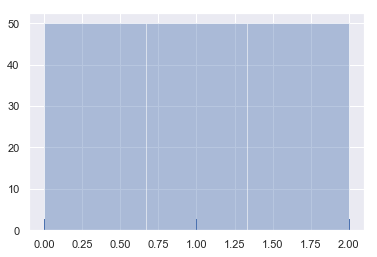

In [10]:
sns.distplot(y, kde=False, rug=True);

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


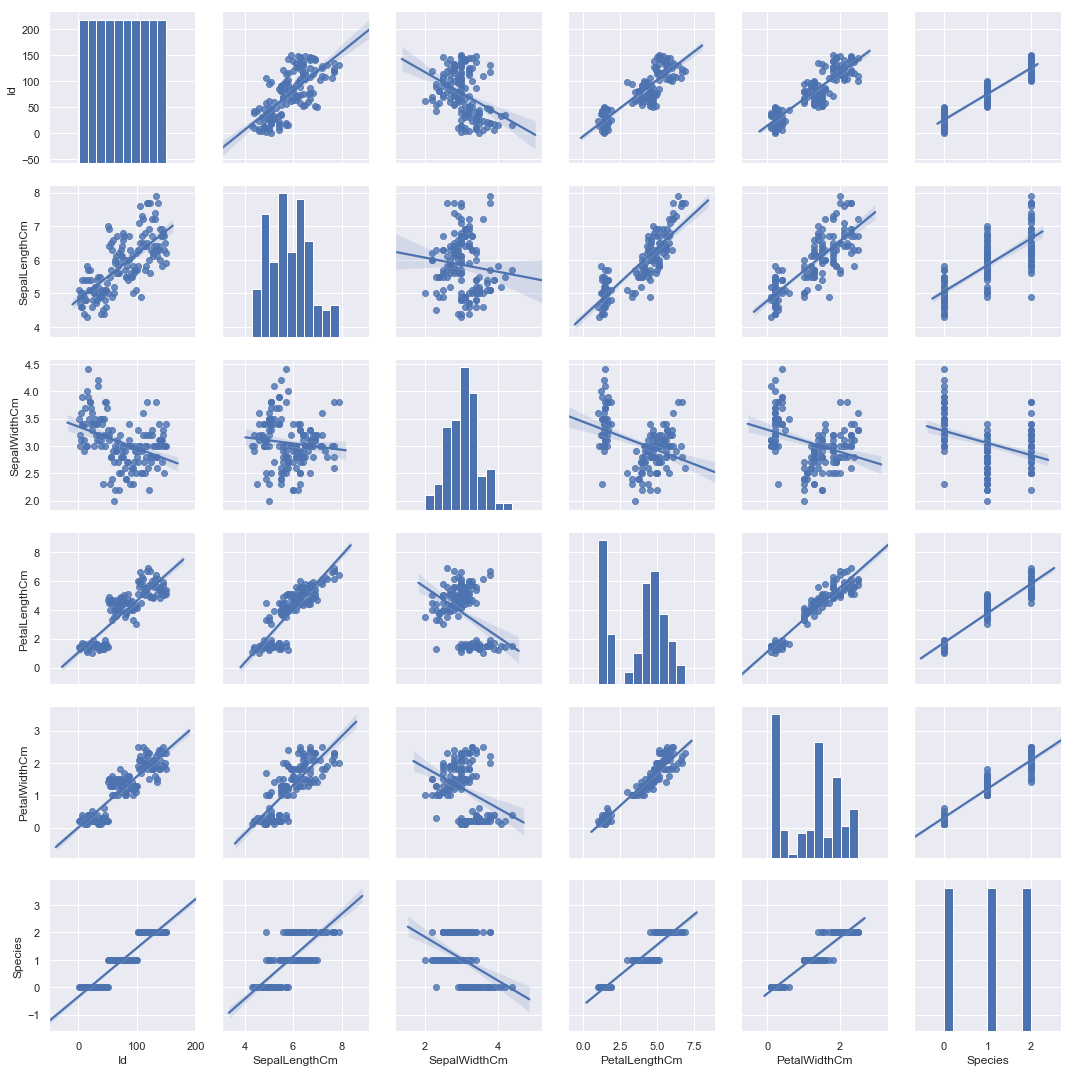

In [30]:
# from pandas.tools.plotting import scatter_matrix
# pd.plotting.scatter_matrix(irdf, alpha=0.5, range_padding=0.5, figsize=[20,20])

sns.pairplot(irdf, kind="reg")

# Insights:

# 1) As evident, from the plot the SepalLengthCm has a +ve and strong correlation with PetalWidthCm and PetalLengthCm
#    but it has a -ve and not so strong correlation with SepalWidthCm 

# 2) As evident, from the plot the SepalWidthCm has a -ve and strong correlation with PetalWidthCm and PetalLengthCm
#    and it has a -ve and not so strong correlation with SepalLengthCm

# 3) As evident, from the plot the PetalLengthCm has a +ve and strong correlation with PetalWidthCm and SepalLengthCm
#    but it has a -ve and not so strong correlation with SepalWidthCm

# 4) As evident, from the plot the PetalWidthCm has a +ve and strong correlation with PetalLengthCm and SepalLengthCm
#    but it has a -ve and not so strong correlation with SepalWidthCm

# 5) The histograms for SepalLengthCm and SepalWidthCm are fairly normally distributed whereas the histograms for 
#    PetalLengthCm and PetalWidthCm are slightly right skewed

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [12]:
irdf.describe(include='all').T

# Insights:

# PetalLengthCm has the highest standard deviation whereas SepalWidthCm has the lowest standard deviation

# SepalLengthCm has the highest mean value whereas PetalWidthCm has the lowest mean value (not considering Species)

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5
Species,150.0,1.000000,0.819232,0.0,0.00,1.00,2.00,2.0


In [13]:
#Drop Id variable from data

X = irdf.drop('Id', axis = 1)

### Correlation among all variables and give your insights (1 Marks)

In [14]:
#Please note, it's required to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

irdf.corr()

# Insights:

# Species has a high +ve correlation with PetalWidthCm and PetalLengthCm

# Species has a negative correlation with SepalWidthCm


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


### Split data in Training and Validation in 80:20 (1 Marks)

In [15]:
### SPLITTING INTO TRAINING AND TEST SETS
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.20, random_state=0)

### Do Feature Scaling ( 1 Marks)

In [16]:
# Use StandardScaler or similar methods
scaler = StandardScaler()
scaled_data = scaler.fit_transform(irdf)
scaled_features_df = pd.DataFrame(scaled_data, index=irdf.index, columns=irdf.columns)
scaled_features_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977,-1.224745
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977,-1.224745
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977,-1.224745
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977,-1.224745
5,-1.605069,-0.537178,1.957669,-1.170675,-1.050031,-1.224745
6,-1.581975,-1.506521,0.800654,-1.341272,-1.181504,-1.224745
7,-1.558880,-1.021849,0.800654,-1.284407,-1.312977,-1.224745
8,-1.535786,-1.748856,-0.356361,-1.341272,-1.312977,-1.224745
9,-1.512691,-1.143017,0.106445,-1.284407,-1.444450,-1.224745


### Train and Fit NaiveBayes Model(2 Marks)

In [17]:
#Fit the model
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

GaussianNB(priors=None)


C:\Users\mamirashraff\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
#Predict
expected = y_test
predicted = model.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [19]:
# show Confusion Matrix
print(metrics.confusion_matrix(expected, predicted))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [20]:
# show accuracy
accuracy_test = accuracy_score(expected, predicted)
print(accuracy_test)

1.0


In [21]:
#Show precision and Recall metrics
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      1.00      1.00        13
          2       1.00      1.00      1.00         6

avg / total       1.00      1.00      1.00        30

